EXPLORATORY DATA ANALYSIS
Matches: (1095, 20)
Deliveries: (260920, 17)

MATCHES PER SEASON
season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
dtype: int64


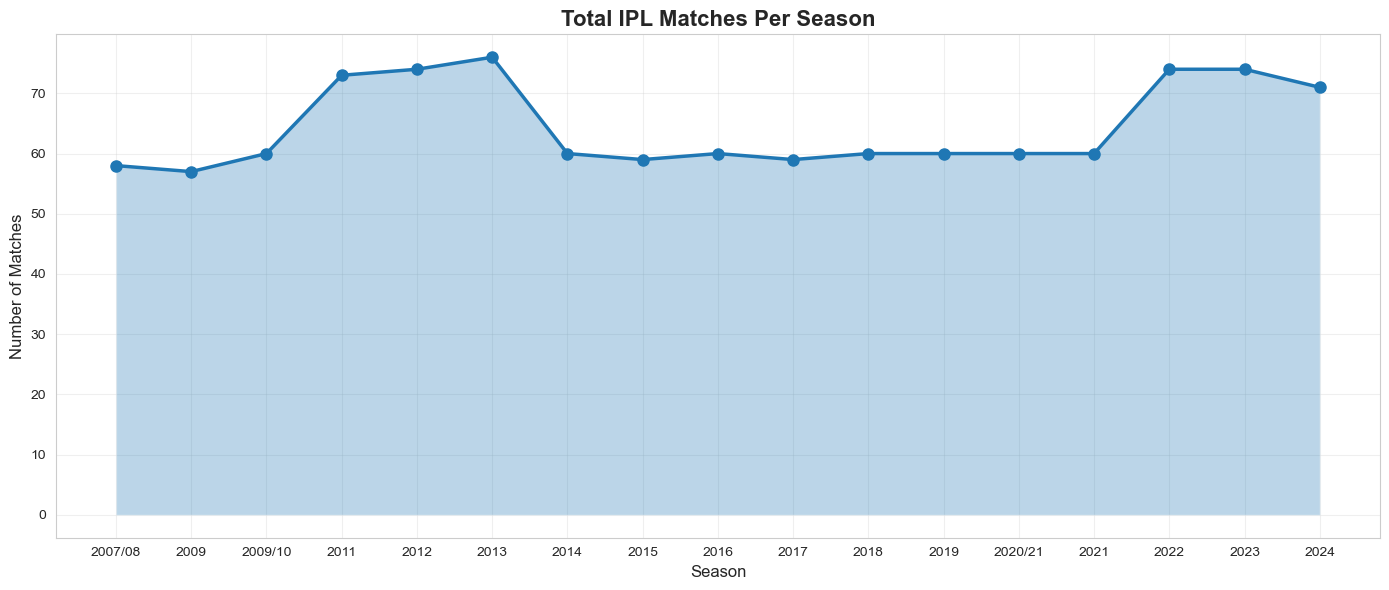


TOP TEAMS BY WINS
winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Name: count, dtype: int64


C:\Users\Sai Tejeswar\AppData\Local\Temp\ipykernel_23756\3869150963.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')


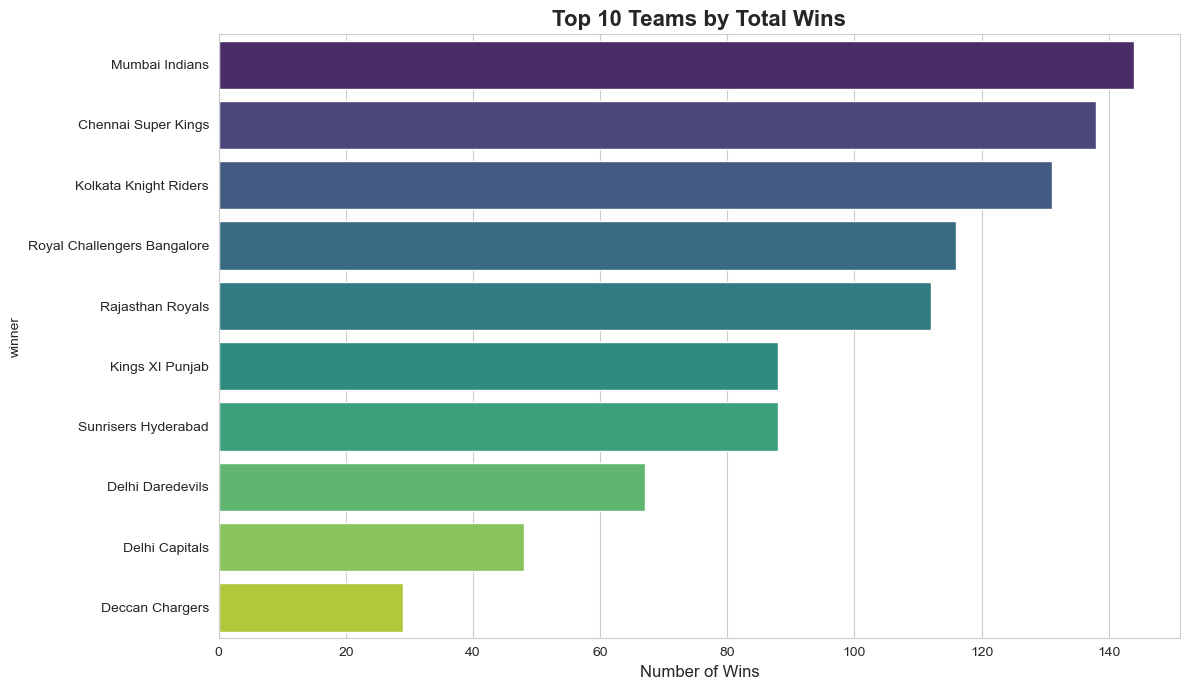


TOSS IMPACT
toss_decision
field    704
bat      391
Name: count, dtype: int64


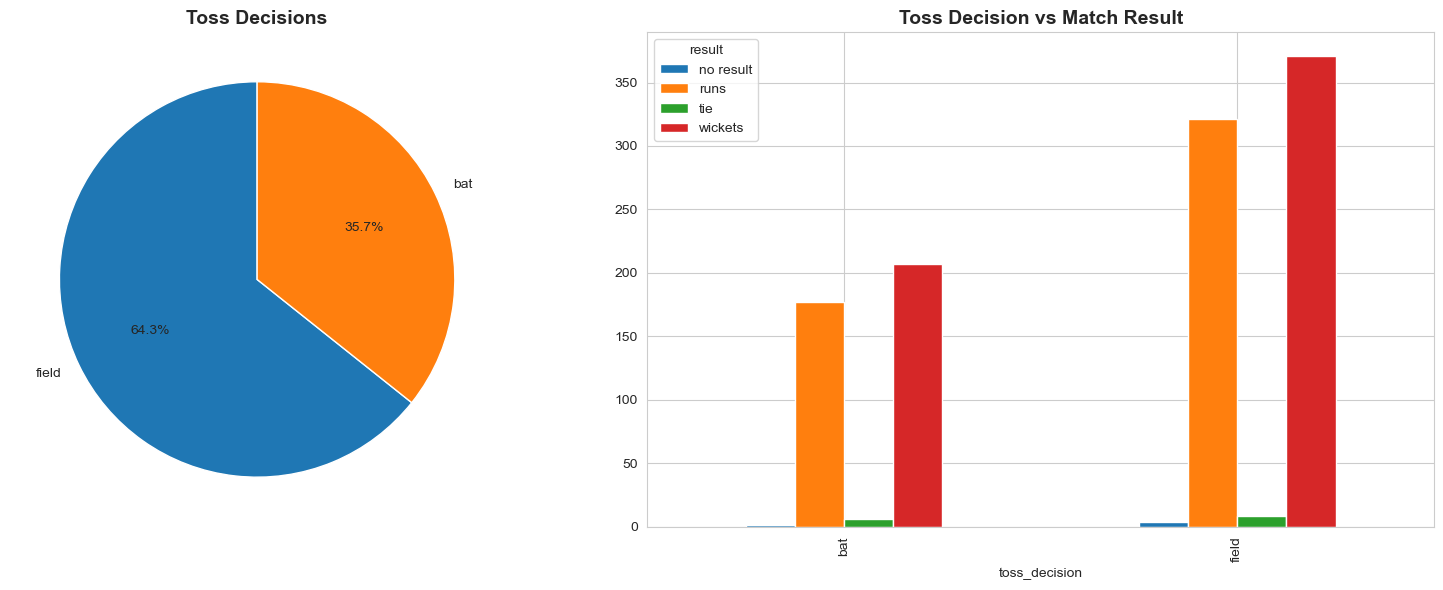


TOP VENUES
venue
Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Feroz Shah Kotla                              60
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Sawai Mansingh Stadium                        47
Dubai International Cricket Stadium           46
Wankhede Stadium, Mumbai                      45
Punjab Cricket Association Stadium, Mohali    35
Name: count, dtype: int64


C:\Users\Sai Tejeswar\AppData\Local\Temp\ipykernel_23756\3869150963.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_venues.values, y=top_venues.index, palette='coolwarm')


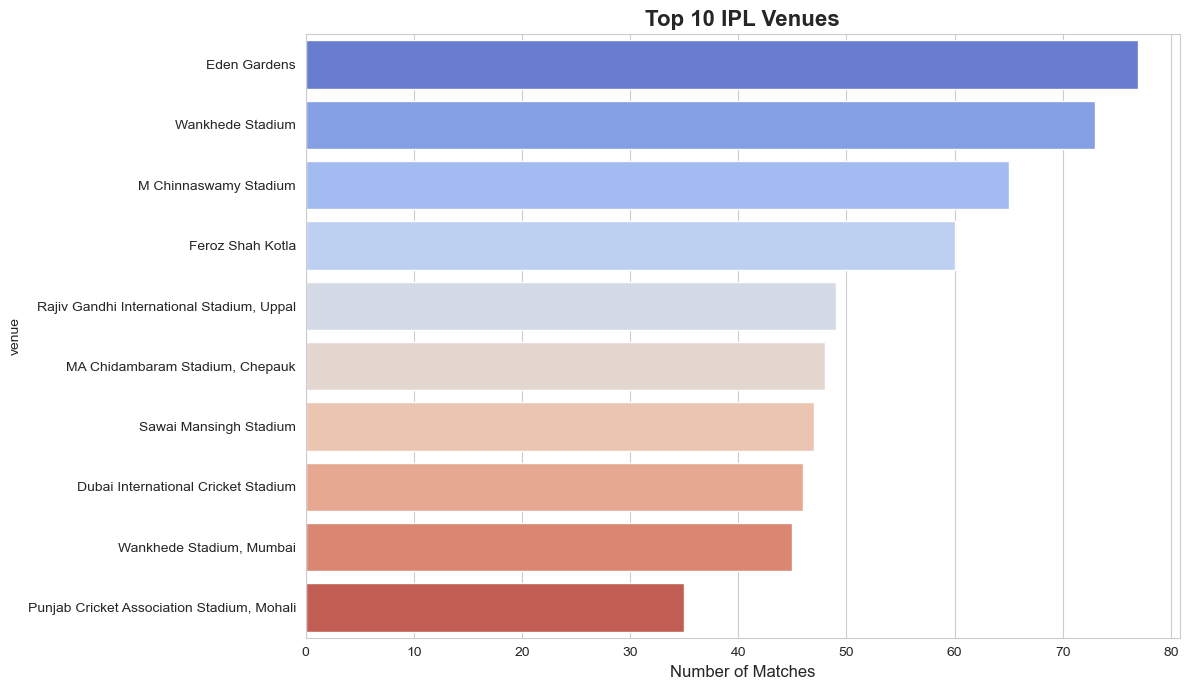


WINNING RUNS
No 'win_by_runs' column found in matches dataframe
Runs data not available for plotting

✅ EDA COMPLETED!


In [7]:
# ============================================
# NOTEBOOK 3: EXPLORATORY DATA ANALYSIS
# ============================================

# CELL 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# CELL 2: Load Data
matches_df = pd.read_csv('../data/matches_cleaned.csv')
deliveries_df = pd.read_csv('../data/deliveries_cleaned.csv')

matches_df['date'] = pd.to_datetime(matches_df['date'], errors='coerce')

print("="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)
print(f"Matches: {matches_df.shape}")
print(f"Deliveries: {deliveries_df.shape}")

# CELL 3: Matches Per Season
print("\n" + "="*60)
print("MATCHES PER SEASON")
print("="*60)

matches_per_season = matches_df.groupby('season').size()
print(matches_per_season)

plt.figure(figsize=(14, 6))
plt.plot(matches_per_season.index, matches_per_season.values, marker='o', linewidth=2.5, markersize=8)
plt.fill_between(matches_per_season.index, matches_per_season.values, alpha=0.3)
plt.title('Total IPL Matches Per Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/01_matches_per_season.png', dpi=300, bbox_inches='tight')
plt.show()

# CELL 4: Top Teams
print("\n" + "="*60)
print("TOP TEAMS BY WINS")
print("="*60)

top_teams = matches_df['winner'].value_counts().head(10)
print(top_teams)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')
plt.title('Top 10 Teams by Total Wins', fontsize=16, fontweight='bold')
plt.xlabel('Number of Wins', fontsize=12)
plt.tight_layout()
plt.savefig('../outputs/figures/02_top_teams_wins.png', dpi=300, bbox_inches='tight')
plt.show()

# CELL 5: Toss Impact
print("\n" + "="*60)
print("TOSS IMPACT")
print("="*60)

toss_decisions = matches_df['toss_decision'].value_counts()
print(toss_decisions)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(toss_decisions.values, labels=toss_decisions.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Toss Decisions', fontsize=14, fontweight='bold')

toss_result = pd.crosstab(matches_df['toss_decision'], matches_df['result'])
toss_result.plot(kind='bar', ax=axes[1])
axes[1].set_title('Toss Decision vs Match Result', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/03_toss_impact.png', dpi=300, bbox_inches='tight')
plt.show()

# CELL 6: Top Venues
print("\n" + "="*60)
print("TOP VENUES")
print("="*60)

top_venues = matches_df['venue'].value_counts().head(10)
print(top_venues)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_venues.values, y=top_venues.index, palette='coolwarm')
plt.title('Top 10 IPL Venues', fontsize=16, fontweight='bold')
plt.xlabel('Number of Matches', fontsize=12)
plt.tight_layout()
plt.savefig('../outputs/figures/04_top_venues.png', dpi=300, bbox_inches='tight')
plt.show()

# CELL 7: Runs Distribution (Corrected)
print("\n" + "="*60)
print("WINNING RUNS")
print("="*60)

if 'win_by_runs' in matches_df.columns:
    runs_data = matches_df['win_by_runs'].dropna()
else:
    runs_data = []
    print("No 'win_by_runs' column found in matches dataframe")

if len(runs_data) > 0:
    print(f"Mean: {runs_data.mean():.2f}")
    print(f"Median: {runs_data.median():.2f}")

    plt.figure(figsize=(12, 6))
    plt.hist(runs_data, bins=30, edgecolor='black', alpha=0.7, color='orange')

    mean_val = runs_data.mean()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')

    plt.title('Distribution of Winning Runs', fontsize=14, fontweight='bold')
    plt.xlabel('Runs')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('../outputs/figures/05_runs_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Runs data not available for plotting")

print("\n✅ EDA COMPLETED!")

